<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

    
Hola, David! Ya casi tienes listo el proyecto, solamente te deje un comentario  final en el apartado "1.2 Agregar datos por usuario"
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Revise la sección 1.2 y no veo la recomendación o solicitud de posible corrección relacionada a agregar datos por usuario, me apoyas en saber bien donde esta.

También, me ayudas comentando si con base en tu comentario fue mejor usar el método where en vez de     
    
También, en la parte donde utilice if´s para hacer un análisis, abajo puse un metodo usando where, me dices si ese 1.13 Estudia el comportamiento del usuario
   
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Una disculpa David, es en la sección 1.12. Lo coloqué en rojo.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Gracias por la aclaración. Ya hice la modificación tomando en cuenta gigabytes en vez de megas.
Igual me ayudas a revisar si consideras es mejor metodo usar where en vez de los if´s
   
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Hola, hice todas las correciones practicamente pero me volvieron a subir el mismo archivo con los mismos comentarios, me ayudan con la actualización
</div>

En este estudio voy a tener que analizar el comportamiento de los usuarios en relación a las llamadas hechas, mensajes enviados y megas gastados. Los usuarios contratan un plan en especifico, en este caso hay dos, el surf y el ultimate, cada uno tiene sus propias características y "beneficios". En el análisis veremos si podemos determinar que tan alejados se encuentran los usuarios del uso que le dean a cada uno de los beneficios, y el costo adicional en que incurren al alejarse de esto ( que ese costo sería ingreso para nosotros la empresa)

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import math


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")




In [3]:
# Mostramos todas las tablas, su información relevante para determinar valores ausentes o si el tipo
# de dato de cada columna esta correcto o tenemos que hacer alguna modificación
print("Calls dataframe")
print(calls.head())
print()
print(calls.info())
print()
print("Internet dataframe")
print(internet.head())
print()
print(internet.info())
print()
print("Messages dataframe")
print(messages.head())
print()
print(messages.info())
print()
print("Plans dataframe")
print(plans.head())
print()
print(plans.info())
print()
print("Users dataframe")
print(users.head())
print()
print(users.info())


Calls dataframe
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

Internet dataframe
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

<class 'pandas.core.fra

## Preparar los datos

Vamos a revisar cada una de las tablas y ver si es necesario corregir algo o agregar alguna infomación

## Tarifas

Imprime la información general/resumida sobre el DataFrame de las tarifas



In [4]:
# Imprime una muestra de los datos para las tarifas
print(plans.head())
print()
print()
plans.info()




   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   p

Revisando la información del dataframe "plans" que contiene los datos sobre las tarifas no encuentro ningún problema. Los tipos de datos son adecuados, no tenemos valore nulos (NaN). La información es solamente una descripción de los dos planes, el surf y el ultimate, por ende, sólo contiene dos filas, en una tiene toda la información del plan surf y en otra del plan ultimate.

## Corregir datos

No es necesario corregir algun dato

## Enriquecer los datos

Considero que no es necesario agregar algun dato a esta tabla

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users.head())
print()
print()
users.info()
print()
print()
print(users.describe())
print()



   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null  

In [6]:
print(users[users["user_id"].duplicated()].count())

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64


In [7]:
# Imprime una muestra de datos para usuarios
print(users.sample(15))



     user_id first_name   last_name  age  \
345     1345   Pasquale    Caldwell   26   
195     1195        Roy       Velez   60   
151     1151      Ralph      Monroe   21   
286     1286      Casie   Castaneda   52   
390     1390    Deloras  Strickland   61   
413     1413      Andre     Hensley   38   
402     1402      Jesus       Berry   25   
325     1325     Cleora       Lyons   43   
456     1456    Seymour       Olsen   66   
492     1492      Elvie       Jones   63   
173     1173    Tristan        Cain   27   
380     1380    Lajuana      Kelley   35   
364     1364    Clarine      Bonner   75   
383     1383  Margarito       Mccoy   52   
420     1420     Season       Hardy   27   

                                            city    reg_date      plan  \
345       Los Angeles-Long Beach-Anaheim, CA MSA  2018-07-12      surf   
195      Portland-Vancouver-Hillsboro, OR-WA MSA  2018-06-09      surf   
151    New York-Newark-Jersey City, NY-NJ-PA MSA  2018-03-20      surf   

El dataframe "users" contiene 500 registros de usuarios, se incluye entre otras cosas su nombre y apellido, la edad, la ciudad, fecha de suscripción, el plan que contrato, el tipo de plan contratado (surf o ultimate) y también el "churn_date" que es la fecha en el usuario dejo de usar el servicio. Sobre esto último, se indica que si aparece el valor con NaN es que la tarifa se estaba usando cuando se extrajo la base de datos, entonces, eso podría indicar que el usuario sigue activo, es decir, de la muestra de los 500 usuarios, 466 son usuarios activos, y 34 ya no lo son. Es interesante este punto, porque al saber que "la tarifa se estaba usando" pude indicador dos cosas, o que todavia no se termina el mes donde el pago pero ya el siguiente mes no volverá a contratar, o puede ser que el usuario va a seguir con el servicio. Con la información que tenemos no podemos saber cual de las dos premisas es verdadera.

Respecto al datatype veo que practicamente todos estan bien asignados, a excepción de la columna "reg_date" y "churn_date" la cual tienen el tipo de dato objeto, entonces, podría ser buena opción cambiarlas a datatime.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Muy buena conclusión sobre la variable churn_date. Recuerda que siempre puedes usar otras funciones para seguir explorando las variables que te generen inquietud. Por ejemplo, podrías usar value_counts() para ver en que fechas exactamente terminaron sus planes las 34 personas. 
</div>

In [8]:
# Esto es para revisar en que fecha terminan sus planes las 34 personas de las
# cuales si tenemos información de su finalización
users_finished = users["churn_date"].value_counts()
users_finished.head(20)


2018-12-18    3
2018-11-14    2
2018-12-19    2
2018-12-31    2
2018-12-12    1
2018-12-30    1
2018-10-13    1
2018-11-29    1
2018-12-26    1
2018-11-18    1
2018-10-07    1
2018-07-31    1
2018-11-11    1
2018-12-15    1
2018-10-03    1
2018-12-22    1
2018-11-24    1
2018-10-22    1
2018-11-16    1
2018-11-30    1
Name: churn_date, dtype: int64

### Corregir los datos

In [9]:
# Cambiar el nombre de la columna plan por plan_name
users = users.rename(columns={"plan":"plan_name"})

In [10]:
# Cambiar al datatype por datatime en las columnas "reg_date" y "churn_name"
users["reg_date"] = pd.to_datetime(users["reg_date"],format="%Y-%m-%d")
users["churn_date"] = pd.to_datetime(users["churn_date"],format="%Y-%m-%d")


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_date(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


En el codigo de abajo marcado por # lo hice porque queria rellenar los NaN de la 
columna churn_name y así poder realizar ciertos cálculos con ella, sin embargo, mi tutor recomendo no hacer porque era llenar el dataset con datos no reales y eso podria sesgar mis hallazgos. Deje el código solo para entender que queria hacer y el porque no era recomendable

In [12]:
# Este codigo es para cambiar los valores vacios que había en la columna churn_date por una fecha que fuera un mes despues
# a la fecha de la columna "reg_date" esto para calcular cuanto tiempo han estado activos los usuarios, haciendo una suposición
# que por lo menos estarán un mes, ya que dura un mes los beneficios una vez que pagan
#from pandas.tseries.offsets import DateOffset
#users["churn_date"] = users["churn_date"].fillna(users["reg_date"] + DateOffset(months=1))

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Es una buena práctica importar todas las librerías al inicio del código. 
</div>

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Cuando realizamos análisis de los datos no es buena práctica llenar variables de la dataset con valores no reales dado que pueden sesgar los resultados y hallazgos encontrados. En estos casos se recomienda identificarlos y mantenerlos en consideración cuando obtengamos conclusiones. 

</div>

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

In [14]:
# Vamos a crear una columna para ver cuanto dias estuvieron como usuarios activos

users["active_time"] = users["churn_date"] - users["reg_date"]

In [15]:
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date plan_name churn_date active_time  
0 2018-12-24  ultimate        NaT         NaT  
1 2018-08-13      surf        NaT         NaT  
2 2018-10-21      surf        NaT         NaT  
3 2018-01-28      surf        NaT         NaT  
4 2018-05-23      surf        NaT         NaT  


In [16]:
# El promedio de dias activos

average_active = users["active_time"].mean()
average_active

Timedelta('141 days 15:31:45.882352942')

In [17]:
median_active = users["active_time"].median()
median_active

Timedelta('152 days 00:00:00')

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es buena idea sacar el promedio de dias activos, al llenar el valor de los ususarios que actualmente se encuentran activos con una fecha no real el valor calculado no reflejaría la realidad completamente. 
</div>

## Llamadas

In [18]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls.head())
print()
print()
calls.info()
print()
print()
print(calls.describe())
print()



         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600

In [19]:
print(calls[calls["id"].duplicated()].count())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [20]:
# Imprime una muestra de datos para las llamadas
print(calls.sample(30))


               id  user_id   call_date  duration
72920    1257_660     1257  2018-06-07     17.82
114665   1401_489     1401  2018-10-08      6.79
26758     1101_85     1101  2018-06-16     12.23
91559    1329_642     1329  2018-09-13      0.00
69250    1248_157     1248  2018-12-06      4.67
10174     1046_40     1046  2018-10-19      4.05
126237   1447_102     1447  2018-10-28     18.80
132671   1478_125     1478  2018-12-17      0.00
106571   1377_123     1377  2018-08-26     19.73
16470    1064_328     1064  2018-12-18     15.79
70024     1251_35     1251  2018-12-04     11.83
7480      1036_72     1036  2018-09-24      0.00
91945   1329_1539     1329  2018-12-20      0.00
69424    1249_256     1249  2018-06-10      1.73
11986      1053_5     1053  2018-09-12      1.41
81551    1293_748     1293  2018-09-06     12.77
119963   1417_740     1417  2018-08-28     11.74
27650    1105_201     1105  2018-11-10      0.00
2395     1009_817     1009  2018-08-08      0.98
34939    1132_261   

No encuentro ningún error en los datos del dataframe "calls". No tenemos datos ausentes y los datatype de cada columna son adecuados a excepción de la columna "call_date" que esta en datatype object, sería buena idea cambiarla a datatime

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Te sugiero verificar que es correcto el datatype de la columna call_date.

</div>

In [21]:
# Revisando cuantas llamadas realizó un usuario
numbers_calls_users = calls.groupby("user_id")["id"].count().reset_index()
numbers_calls_users.sample(15)

,user_id,id
160,1169,105
446,1464,161
429,1446,196
304,1318,151
229,1240,1022
347,1363,164
205,1216,164
239,1250,219
137,1146,164
29,1030,216


In [22]:
# Revisando cuantos minutos en total hablo un usuario
minutes_calls_users = calls.groupby("user_id")["duration"].sum().reset_index()
minutes_calls_users

,user_id,duration
0,1000,116.83
1,1001,1640.46
2,1002,777.13
3,1003,1041.00
4,1004,2618.95
...,...,...
476,1495,1666.41
477,1496,1376.21
478,1497,276.53
479,1498,3029.97


In [23]:
#Revisando cuantas 
zero_minutes_calls = calls.groupby(["user_id","id"])["duration"].sum().reset_index()
zero_minutes_calls.sample(10)


,user_id,id,duration
111307,1390,1390_91,15.17
49178,1178,1178_1,0.00
85479,1313,1313_511,11.85
23253,1085,1085_139,7.22
12160,1053,1053_430,5.90
35852,1134,1134_302,0.00
98263,1352,1352_801,3.87
51659,1185,1185_726,0.00
27746,1105,1105_91,6.73
58163,1210,1210_195,11.88


Algunos llamadas tienen cero minutos de duración. Con la información que tenemos no podemos saber a que se refiere exactamente, tendriamos que revisar las políticas de la empresa sobre que significa que una llamada tenga cero minutos. Una suposición podria ser que la llamada entra a un buzon, entonces eso no se considera como llamada conectada, o que el cliente haya colgado inmediatamente. Igual sería interesante saber como se manejan las llamadas que tienen cero minutos, si se considera una llamada o no se considera para el conteo

### Corregir los datos

In [24]:
# Cambiaré el datatype de la columna call_date a datetime
calls["call_date"] = pd.to_datetime(calls["call_date"],format="%Y-%m-%d")

In [25]:
print("En esta parte podriamos redondear de una vez los minutos hacia arriba, pero lo haré mas adelante")

En esta parte podriamos redondear de una vez los minutos hacia arriba, pero lo haré mas adelante


### Enriquecer los datos

Seria bueno saber que edad tiene cada usuario así como la ciudad, y si lo vemos prudente mencontrar alguna relación con la cantidad de llamadas que hacen y el tiempo en total que estuvieron hablando. Voy a combinar la tabla de "calls" con las de "users" para poder ver esa información

In [26]:
# Vamos a juntar dos tablas, la de calls y la de users para tener datos más amplios y encontrar ciertas relaciones

merge_calls_users = calls.merge(users, on="user_id")
merge_calls_users.head()

,id,user_id,call_date,duration,first_name,last_name,age,city,reg_date,plan_name,churn_date,active_time
0,1000_93,1000,2018-12-27,8.52,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
1,1000_145,1000,2018-12-27,13.66,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
2,1000_247,1000,2018-12-27,14.48,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
3,1000_309,1000,2018-12-28,5.76,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
4,1000_380,1000,2018-12-30,4.22,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT


In [27]:
# Revisar cuantos minutos hablo cada cliente y de que ciudad es

city_userid_duration = merge_calls_users.groupby(["user_id","city"])["duration"].sum()
city_userid_duration

user_id  city                                     
1000     Atlanta-Sandy Springs-Roswell, GA MSA         116.83
1001     Seattle-Tacoma-Bellevue, WA MSA              1640.46
1002     Las Vegas-Henderson-Paradise, NV MSA          777.13
1003     Tulsa, OK MSA                                1041.00
1004     Seattle-Tacoma-Bellevue, WA MSA              2618.95
                                                       ...   
1495     New York-Newark-Jersey City, NY-NJ-PA MSA    1666.41
1496     New Orleans-Metairie, LA MSA                 1376.21
1497     Los Angeles-Long Beach-Anaheim, CA MSA        276.53
1498     New York-Newark-Jersey City, NY-NJ-PA MSA    3029.97
1499     Orlando-Kissimmee-Sanford, FL MSA            1450.31
Name: duration, Length: 481, dtype: float64

## Mensajes

In [28]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.head())
print()
print()
messages.info()
print()
print()
print(messages.describe())
print()



         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000



In [29]:
# Imprime una muestra de datos para los mensajes
print(messages.sample(15))



             id  user_id message_date
31232   1195_99     1195   2018-11-16
67292  1435_330     1435   2018-09-23
38240  1251_292     1251   2018-05-26
33593  1211_269     1211   2018-08-23
23504  1142_241     1142   2018-12-29
24813  1146_738     1146   2018-12-02
7660   1059_545     1059   2018-09-05
38072  1251_124     1251   2018-05-31
64949  1414_165     1414   2018-09-11
41877  1268_250     1268   2018-04-23
65395  1419_204     1419   2018-11-18
65137    1417_6     1417   2018-11-18
11864  1079_263     1079   2018-09-27
6938   1057_262     1057   2018-10-25
52454  1336_443     1336   2018-09-14


In [30]:
print(messages[messages["id"].duplicated()].count())

id              0
user_id         0
message_date    0
dtype: int64




No tenemos datos ausentes. No tenemos duplicados en la columna que importaría revisar esto que es la columna "id".  El tipo de datos es correcto a excepción de la columna "message_date" donde convendría que estuviera en el typo datetime

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Te sugiero verificar que es correcto el datatype de la columna message_date.

</div>

### Corregir los datos

In [31]:
# Cambiaré el datatype de la columna message_date a datetime
messages["message_date"] = pd.to_datetime(messages["message_date"],format="%Y-%m-%d")

### Enriquecer los datos

In [32]:
# Vamos a juntar dos tablas, la de messages y la de users para tener datos más amplios
# y ver si es prudente encontrar ciertas relaciones

merge_messages_users = messages.merge(users, on="user_id")
merge_messages_users.head()

,id,user_id,message_date,first_name,last_name,age,city,reg_date,plan_name,churn_date,active_time
0,1000_125,1000,2018-12-27,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
1,1000_160,1000,2018-12-31,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
2,1000_223,1000,2018-12-31,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
3,1000_251,1000,2018-12-27,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
4,1000_255,1000,2018-12-26,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT


## Internet

In [33]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet.head())
print()
print()
internet.info()
print()
print()
print(internet.describe())
print()



         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.

In [34]:
print(internet[internet["id"].duplicated()].count())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [35]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.sample(15))



             id  user_id session_date  mb_used
97787  1460_477     1460   2018-12-21     0.00
27222  1126_312     1126   2018-08-17   700.75
40056  1181_175     1181   2018-09-04   734.50
22943  1106_158     1106   2018-11-12   116.65
67229  1312_452     1312   2018-09-27   288.91
63381   1292_85     1292   2018-11-07   686.74
36674  1164_357     1164   2018-11-24   565.62
63060  1291_185     1291   2018-06-21    25.47
10723  1054_258     1054   2018-12-20   456.51
69304   1324_18     1324   2018-10-24  1266.09
40631  1182_348     1182   2018-06-10   138.44
4144    1026_52     1026   2018-07-29    34.87
17300  1077_420     1077   2018-06-22   858.03
35309   1160_13     1160   2018-06-03   290.06
59427   1268_96     1268   2018-12-10   596.99



No tenemos datos ausentes. No tenemos duplicados en la columna que importa saber si son valores únicos que seria "id".  Solamente sería cambiar el datatype de la columna session_date por el tipo datatime.

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Te sugiero verificar que es correcto el datatype de la columna session_date.

</div>

### Corregir los datos

In [36]:
# Cambiaré el datatype de la columna session_date a datetime
internet["session_date"] = pd.to_datetime(internet["session_date"],format="%Y-%m-%d")

### Enriquecer los datos

In [37]:
# Vamos a juntar dos tablas, la de internet y la de users para tener datos más amplios
#y ver si es prudente encontrar ciertas relaciones

merge_internet_users = internet.merge(users, on="user_id")
merge_internet_users.head()

,id,user_id,session_date,mb_used,first_name,last_name,age,city,reg_date,plan_name,churn_date,active_time
0,1000_13,1000,2018-12-29,89.86,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
1,1000_204,1000,2018-12-31,0.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
2,1000_379,1000,2018-12-28,660.40,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
3,1000_413,1000,2018-12-26,270.99,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
4,1000_442,1000,2018-12-27,880.22,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT


## Estudiar las condiciones de las tarifas

In [38]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)



   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Aclaraciones importantes a considerar

*   1 gb = 1000 mb
*   Llamadas se redondean. Si duró un segundo se cobra la llamada completa.
*   Trafico web individual(megas) no se redondean. En vez de esto al final del mes se redondea hacia arriba. Si alguien uso 1025 megabytes este mes, se le cobrarán 2 gigabytes.
* 1 gigabyte equivale a 1000 megabytes




<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Te sugiero verificar a cuánto equivale un gb para cuando hagas la transformación.

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Veo que me comentas que revise la equivalencia de gb. Investigando un GB equivale a 1000 megabytes, y esa es la conversión que utilice durante todo este trabajo. Segun investige, y esa es la convención que se usaría en esta industria, porque hay otra convención de que 1 gb equivale a 1024 megabytes pero esa es para sistemas binarios y es usada en el contexto de computación, entonces no aplicaría aqui.
    
</div>



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Hola, David!! Para este ejercicio te sugiero utilizar la convención de 1024.

</div>

## Agregar datos por usuario


In [39]:
# Crear una columna del mes
calls["month"] = calls["call_date"].dt.month

# Redondear los minutos
calls["duration"] = np.ceil(calls["duration"]) 

# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

total_calls_user = calls.groupby(["user_id","month"])["id"].count().reset_index()
total_calls_user = pd.DataFrame(total_calls_user)
total_calls_user.head(15)



,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


In [40]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

total_minutes_user = calls.groupby(["user_id","month"])["duration"].sum()
total_minutes_user = pd.DataFrame(total_minutes_user)
total_minutes_user



duration
user_id month          
1000    12        124.0
1001    8         182.0
        9         315.0
        10        393.0
        11        426.0
...                 ...
1498    12        339.0
1499    9         346.0
        10        385.0
        11        308.0
        12        496.0

[2258 rows x 1 columns]

In [41]:
# Calcula el número de llamadas hechas por cada usuario al mes y la cantidad 
# de minutos usados por cada usuario al mes.Guarda el resultado.
# Para esto crearé una tabla dinamica



# Luego creare la tabla dinamica

pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                            values=['duration'],
                            aggfunc=['sum','count']).reset_index()
pivot_calls

,user_id,month,sum,count
,,,duration,duration
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64
...,...,...,...,...
2253,1498,12,339.0,39
2254,1499,9,346.0,41
2255,1499,10,385.0,53


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>



In [42]:
# Crear una columna del mes
messages["month"] = messages["message_date"].dt.month

# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
total_messages_user = messages.groupby(["user_id","month"])["id"].count().reset_index()
total_messages_user = pd.DataFrame(total_messages_user)
total_messages_user



,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Te recomiendo desde este paso redondear la duración de las llamadas.

</div>

In [43]:
# Crear una columna del mes

internet["month"] = internet["session_date"].dt.month

# Tranformar los megabytes a gigabytes con la convención 1 GB == 1024 megabytes

internet["mb_used"] = internet["mb_used"] / 1024

# Redondear hacia arriba los gigabytes resultantes

internet["mb_used"] = np.ceil(internet["mb_used"])

# Cambiar el nombre de la columna mb_used por gb_used
internet = internet.rename(columns={"mb_used":"gb_used"})


# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
volume_internet_user = internet.groupby(["user_id","month"])["gb_used"].sum().reset_index()
volume_internet_user = pd.DataFrame(volume_internet_user)
volume_internet_user



,user_id,month,gb_used
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0
...,...,...,...
2272,1498,12,56.0
2273,1499,9,37.0
2274,1499,10,52.0
2275,1499,11,43.0


<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Hola, David. Ya casi tienes todo listo para este proyeto. Solamente te recomiendo verificar que la transformación de de megabytes a gigabytes es correcta. Además, verificar que es correcto hacer la multiplicación posterior por 100.

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
 
   
</div>

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Recuerda convertir los mb a gb y redondear el valor para que vaya en el sentido del análisis desarrollado.

</div>

In [44]:
# Fusionar los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Nombre de los data frames:
#total_calls_user
#total_minutes_user
#total_messages_user
#volume_internet_user

merge_calls_min_mess_int = (total_calls_user
                            .merge(total_minutes_user,on=["user_id","month"],how="outer")
                            .merge(total_messages_user,on=["user_id","month"],how="outer")
                            .merge(volume_internet_user,on=["user_id","month"],how="outer"))



In [45]:
# Renombrar los nombres de ciertas columunas para que el nombre sea más representativo
# id_x = total llamadas
# id_y = total mensajes

merge_calls_min_mess_int = merge_calls_min_mess_int.rename(columns={"id_x":"total_calls",
                                                                    "duration":"total_minutes",
                                                                    "id_y":"total_messages"})

In [46]:
merge_calls_min_mess_int = merge_calls_min_mess_int.reset_index(drop=True)

In [47]:
merge_calls_min_mess_int.head()

,user_id,month,total_calls,total_minutes,total_messages,gb_used
0,1000,12,16.0,124.0,11.0,4.0
1,1001,8,27.0,182.0,30.0,21.0
2,1001,9,49.0,315.0,44.0,41.0
3,1001,10,65.0,393.0,53.0,50.0
4,1001,11,64.0,426.0,36.0,49.0


In [48]:
# Fusionar dataframe users con plans para saber que usuario tiene que plan y con que características
merge_users_plans = users.merge(plans, on="plan_name")

In [49]:
# Añade la información de la tarifa
merge_consumption_plans = merge_calls_min_mess_int.merge(merge_users_plans,on="user_id",how="left")




In [50]:
merge_consumption_plans.head()

,user_id,month,total_calls,total_minutes,total_messages,gb_used,first_name,last_name,age,city,...,plan_name,churn_date,active_time,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,4.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaT,NaT,1000,30720,3000,70,7,0.01,0.01
1,1001,8,27.0,182.0,30.0,21.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,NaT,50,15360,500,20,10,0.03,0.03
2,1001,9,49.0,315.0,44.0,41.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,NaT,50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,393.0,53.0,50.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,NaT,50,15360,500,20,10,0.03,0.03
4,1001,11,64.0,426.0,36.0,49.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,NaT,50,15360,500,20,10,0.03,0.03


In [51]:
merge_consumption_plans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   user_id                2293 non-null   int64          
 1   month                  2293 non-null   int64          
 2   total_calls            2258 non-null   float64        
 3   total_minutes          2258 non-null   float64        
 4   total_messages         1806 non-null   float64        
 5   gb_used                2277 non-null   float64        
 6   first_name             2293 non-null   object         
 7   last_name              2293 non-null   object         
 8   age                    2293 non-null   int64          
 9   city                   2293 non-null   object         
 10  reg_date               2293 non-null   datetime64[ns] 
 11  plan_name              2293 non-null   object         
 12  churn_date             158 non-null    datetime6

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

El merge es correcto, pero te recomiendo que antes de juntar las bases transformes todas las variables necesarias como redondear algunas variables (duración) y transformar otras (mb a gb). Dado que cuando haces la agrupación por ususario tomas el valor total y no los valores transformados

</div>

In [52]:
merge_consumption_plans["total_calls"] = merge_consumption_plans["total_calls"].fillna(0)
merge_consumption_plans["total_minutes"] = merge_consumption_plans["total_minutes"].fillna(0)
merge_consumption_plans["total_messages"] = merge_consumption_plans["total_messages"].fillna(0)
merge_consumption_plans["mb_used"] = merge_consumption_plans["gb_used"].fillna(0)

In [53]:
merge_consumption_plans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   user_id                2293 non-null   int64          
 1   month                  2293 non-null   int64          
 2   total_calls            2293 non-null   float64        
 3   total_minutes          2293 non-null   float64        
 4   total_messages         2293 non-null   float64        
 5   gb_used                2277 non-null   float64        
 6   first_name             2293 non-null   object         
 7   last_name              2293 non-null   object         
 8   age                    2293 non-null   int64          
 9   city                   2293 non-null   object         
 10  reg_date               2293 non-null   datetime64[ns] 
 11  plan_name              2293 non-null   object         
 12  churn_date             158 non-null    datetime6

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Te sugiero verificar a cuánto equivale un gb para cuando hagas la transformación.

</div>

In [54]:
# Convertir los mensajes a integer
merge_consumption_plans["total_messages"] = merge_consumption_plans["total_messages"].astype(int)


In [55]:
merge_consumption_plans.head()

,user_id,month,total_calls,total_minutes,total_messages,gb_used,first_name,last_name,age,city,...,churn_date,active_time,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,mb_used
0,1000,12,16.0,124.0,11,4.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,NaT,1000,30720,3000,70,7,0.01,0.01,4.0
1,1001,8,27.0,182.0,30,21.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,NaT,50,15360,500,20,10,0.03,0.03,21.0
2,1001,9,49.0,315.0,44,41.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,NaT,50,15360,500,20,10,0.03,0.03,41.0
3,1001,10,65.0,393.0,53,50.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,NaT,50,15360,500,20,10,0.03,0.03,50.0
4,1001,11,64.0,426.0,36,49.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,NaT,50,15360,500,20,10,0.03,0.03,49.0


In [56]:
# Calcula el ingreso mensual para cada usuario
user_month_income = merge_consumption_plans.groupby(["user_id","month","plan_name"])["total_minutes"].sum()
user_month_income = pd.DataFrame(user_month_income)
user_month_income = user_month_income.reset_index()
user_month_income


,user_id,month,plan_name,total_minutes
0,1000,12,ultimate,124.0
1,1001,8,surf,182.0
2,1001,9,surf,315.0
3,1001,10,surf,393.0
4,1001,11,surf,426.0
...,...,...,...,...
2288,1498,12,surf,339.0
2289,1499,9,surf,346.0
2290,1499,10,surf,385.0
2291,1499,11,surf,308.0


In [57]:
income_minutes = user_month_income[(user_month_income["plan_name"] == "surf") & (user_month_income["total_minutes"] > 500)]
income_minutes = income_minutes.reset_index(drop=True)
income_minutes.head(15)


,user_id,month,plan_name,total_minutes
0,1003,12,surf,1104.0
1,1007,10,surf,645.0
2,1007,11,surf,524.0
3,1007,12,surf,617.0
4,1009,5,surf,534.0
5,1009,6,surf,823.0
6,1009,7,surf,880.0
7,1009,8,surf,731.0
8,1009,9,surf,776.0
9,1009,10,surf,740.0


In [93]:
def calculate_expense(row):
  if row["plan_name"] == "surf" and row["total_minutes"] > 500:
    return (row["total_minutes"]-500) * 0.03
  elif row["plan_name"] == "ultimate" and row["total_minutes"] > 3000:
    return (row["total_minutes"]-3000) * 0.01
  else:
    return 0

income_minutes["expenses_minutes"] = income_minutes.apply(calculate_expense, axis = 1)

CPU times: user 20.5 ms, sys: 0 ns, total: 20.5 ms
Wall time: 18.4 ms


<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Verifica el nombre del plan dado que lo tienes como "ultumate" esto puede hacer que nunca se consideren los exceso en este plan.

</div>

In [59]:
income_minutes.head()

,user_id,month,plan_name,total_minutes,expenses_minutes
0,1003,12,surf,1104.0,18.12
1,1007,10,surf,645.0,4.35
2,1007,11,surf,524.0,0.72
3,1007,12,surf,617.0,3.51
4,1009,5,surf,534.0,1.02


En los codigos anteriores realice el cálculo del costo por usuario y por mes en relacion a los minutos gastados. Sin embargo,tendria que hacer lo mismo para cada columna que genera un costo adicional en caso de pasarse de lo incluido en el plan. Entonces, para no escribir tanto código, creare una función que sintetize todo en una sola columna




In [96]:
%%time
# Función que calcula el ingreso mensual(o costo para el usuario) para cada usuario.

def calculate_total_expenses(row):

  if row["plan_name"] == "surf":
    expense = 20
    if row["total_minutes"] > 500:
      expense += (row["total_minutes"]-500) * 0.03
    if row["total_messages"] > 50:
      expense += (row["total_messages"]-50) * 0.03
    if row["gb_used"] > 15:
      expense += (row["gb_used"] - 15) * 10
  elif row["plan_name"] == "ultimate":
    expense = 70
    if row["total_minutes"] > 3000:
      expense += (row["total_minutes"]-3000) * 0.01
    if row["total_messages"] > 1000:
      expense += (row["total_messages"]-1000) * 0.01
    if row["gb_used"] > 30:
      expense += (row["gb_used"] - 30) * 7

  return expense

merge_consumption_plans["total_expenses"] = merge_consumption_plans.apply(calculate_total_expenses, axis=1)

CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 101 ms


In [61]:
print(merge_consumption_plans[["user_id","month","plan_name","total_expenses"]].head(15))

    user_id  month plan_name  total_expenses
0      1000     12  ultimate           70.00
1      1001      8      surf           80.00
2      1001      9      surf          280.00
3      1001     10      surf          370.09
4      1001     11      surf          360.00
5      1001     12      surf          420.00
6      1002     10      surf           20.00
7      1002     11      surf          320.00
8      1002     12      surf          240.00
9      1003     12      surf          418.12
10     1004      5      surf           20.00
11     1004      6      surf          450.00
12     1004      7      surf          480.00
13     1004      8      surf          570.00
14     1004      9      surf          350.00


In [62]:
# Los gastos totales por mes por usuario
total_expense_month = merge_consumption_plans.groupby(["month","user_id"])["total_expenses"].sum()
print(total_expense_month.head(20))


month  user_id
1      1042        20.00
       1077        70.00
       1185        70.00
       1196        70.00
       1214        70.00
       1362        80.00
2      1028        70.00
       1042        20.00
       1077       133.00
       1099        20.00
       1138       300.00
       1155        70.00
       1171       330.00
       1185       224.00
       1196       154.00
       1214       245.00
       1246       252.00
       1261        20.00
       1359       310.00
       1362       199.57
Name: total_expenses, dtype: float64


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Para no usar if´s realice las dos lineas de código de abajo, las deje en # solo para saber si es correcta esa forma y asi sustuir la anterior. Me puedes confirmar si es mejor
</div>

In [97]:
%%time
surf_expense = 20
surf_expense += np.where(merge_consumption_plans["total_minutes"] > 500,
                         (merge_consumption_plans["total_minutes"] - 500) * 0.03,0)
surf_expense += np.where(merge_consumption_plans["total_messages"] > 50,
                         (merge_consumption_plans["total_messages"] - 50) * 0.03,0)
surf_expense += np.where(merge_consumption_plans["gb_used"] > 15,
                         (merge_consumption_plans["mb_used"] - 15) *10,0)

ultimate_expense = 70
ultimate_expense += np.where(merge_consumption_plans["total_minutes"] > 3000,
                            (merge_consumption_plans["total_minutes"]-3000)*0.01,0)
ultimate_expense += np.where(merge_consumption_plans["total_messages"] > 1000,
                            (merge_consumption_plans["total_messages"]-1000)*0.01,0)
ultimate_expense += np.where(merge_consumption_plans["gb_used"] > 30,
                            (merge_consumption_plans["gb_used"]-30) * 10,0)
merge_consumption_plans["total_expenses2"] = np.where(merge_consumption_plans["plan_name"]=="surf",
                                                      surf_expense,ultimate_expense)




CPU times: user 9.7 ms, sys: 0 ns, total: 9.7 ms
Wall time: 9.6 ms


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Considero que de esta forma es más eficiente el código. De igual manera cuando quieras determinar de qué forma es más eficiente puedes hacer uso de la siguiente función.  
</div>

In [64]:
# Rsto lo hice para revisar que el resultado de ambos metodos, el método de if's
# y el método de where diera el mismo resultado
print(merge_consumption_plans[["user_id","month","plan_name","total_expenses","total_expenses2"]].head(15))

    user_id  month plan_name  total_expenses  total_expenses2
0      1000     12  ultimate           70.00            70.00
1      1001      8      surf           80.00            80.00
2      1001      9      surf          280.00           280.00
3      1001     10      surf          370.09           370.09
4      1001     11      surf          360.00           360.00
5      1001     12      surf          420.00           420.00
6      1002     10      surf           20.00            20.00
7      1002     11      surf          320.00           320.00
8      1002     12      surf          240.00           240.00
9      1003     12      surf          418.12           418.12
10     1004      5      surf           20.00            20.00
11     1004      6      surf          450.00           450.00
12     1004      7      surf          480.00           480.00
13     1004      8      surf          570.00           570.00
14     1004      9      surf          350.00           350.00


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma en la que calculaste el gasto total por usuario, en ocasiones donde tengas muchas condiciones hacer un if para cada una puede no ser una forma muy tardada y no muy eficiente de realizar la actividad. En estos casos te recomiendo crear una variable para cada una las variables (llamadas, mensajes e internet) y después juntar estas nuevas variables en tu base total.

</div>

## Estudia el comportamiento de usuario

### Llamadas

In [65]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

#print(merge_consumption_plans.head())
average_minutes = merge_consumption_plans.groupby(["month","plan_name"])["total_minutes"].mean()
average_minutes = average_minutes.reset_index()
average_minutes.head()

,month,plan_name,total_minutes
0,1,surf,203.000000
1,1,ultimate,193.500000
2,2,surf,297.000000
3,2,ultimate,403.142857
4,3,surf,330.000000


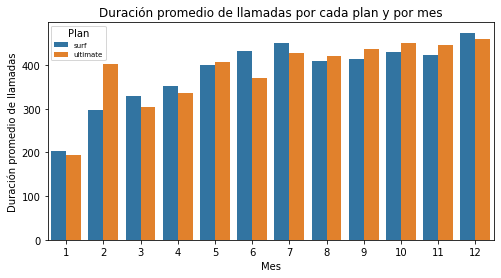

In [66]:
# Graficar la relación del promedio de los minutos, planes y el mes
plt.figure(figsize=(8,4))
sns.barplot(x="month", y="total_minutes", hue="plan_name", data=average_minutes)
plt.title("Duración promedio de llamadas por cada plan y por mes")
plt.xlabel("Mes")
plt.ylabel("Duración promedio de llamadas")
plt.legend(prop={"size":7}).set_title("Plan")
plt.show()




In [67]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_variance_minutes = merge_consumption_plans.groupby(["plan_name","month"])["total_minutes"].agg(["mean","var"]).reset_index()
mean_variance_minutes



,plan_name,month,mean,var
0,surf,1,203.000000,15842.000000
1,surf,2,297.000000,52226.500000
2,surf,3,330.000000,35809.363636
3,surf,4,351.540000,50866.743265
4,surf,5,399.584416,59754.219754
5,surf,6,431.298969,45592.628436
6,surf,7,449.983471,61005.099725
7,surf,8,410.111111,54344.645963
8,surf,9,414.226804,46595.958656
9,surf,10,429.729958,52278.664056


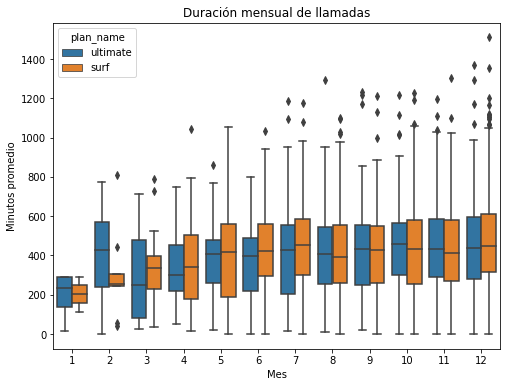

In [68]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(8,6))
sns.boxplot(x="month",y="total_minutes", hue= "plan_name", data=merge_consumption_plans)
plt.xlabel("Mes")
plt.ylabel("Minutos promedio")
plt.title("Duración mensual de llamadas")
plt.show()


El comportamiento de los usuarios en relación a los minutos que usan para llamadas es muy parecido, inclusive, en ambos planes, se noto una tendencia positiva en la contratación de los planes mientras más avanzada el año, sin embargo, para el plan ultimate si bien iban aumentando las contrataciones mes a mes hasta el final del año no eran tanto el incremento de un mes a otro, pero , en el caso de surf, si eran saltos más grandes y esto se aprecia mas apartir del mes 7 (julio). Y sobre los minutos promedios utilizados, ambos planes muestran datos muy parecidos.

También vemos que el plan de surf tiene a tender muchos outliders o valores atipicos, es decir, que gastan más minutos que el resto de los usuarios en ese mes. Se podría revisar esos casos, los cuales podrian ser potenciales a que les ofrezcamos el plan ultimate, que si bien es mas caro, les da mas beneficios, pero igual ese precio adicional que pagan , es un beneficio económico mayor para la empresa.

In [69]:
# En este codigo buscaba ver cuanto planeas habian sido contratados por tipo de plan y por mes, para revisar
# la tendencia que seguian dependiendo el mes del año.
count_clients = merge_consumption_plans.groupby(["plan_name","month"])["user_id"].count().reset_index()
print(count_clients)

   plan_name  month  user_id
0       surf      1        2
1       surf      2        9
2       surf      3       23
3       surf      4       50
4       surf      5       77
5       surf      6       97
6       surf      7      121
7       surf      8      162
8       surf      9      194
9       surf     10      237
10      surf     11      283
11      surf     12      318
12  ultimate      1        4
13  ultimate      2        7
14  ultimate      3       12
15  ultimate      4       21
16  ultimate      5       29
17  ultimate      6       47
18  ultimate      7       59
19  ultimate      8       71
20  ultimate      9       86
21  ultimate     10      106
22  ultimate     11      127
23  ultimate     12      151


### Mensajes

In [70]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_per_plan = merge_consumption_plans.groupby(["plan_name","month"])["total_messages"].sum().reset_index()
messages_per_plan


,plan_name,month,total_messages
0,surf,1,21
1,surf,2,108
2,surf,3,351
3,surf,4,870
4,surf,5,1849
5,surf,6,2454
6,surf,7,3271
7,surf,8,4662
8,surf,9,5968
9,surf,10,8020


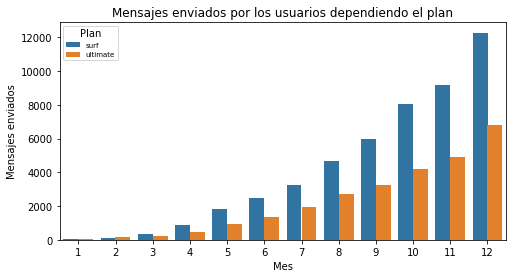

In [71]:
# Graficar la relación entre los minutos enviados cada mes por cada plan

plt.figure(figsize=(8,4))
sns.barplot(x="month", y="total_messages", hue="plan_name", data=messages_per_plan)
plt.xlabel("Mes")
plt.ylabel("Mensajes enviados")
plt.title("Mensajes enviados por los usuarios dependiendo el plan")
plt.legend(prop={"size":7}).set_title("Plan")
plt.show()



In [72]:
# Calcula la media y la varianza de los mensajes enviados por plan.
mean_variance_mess = merge_consumption_plans.groupby(["plan_name","month"])["total_messages"].agg(["mean","var"]).reset_index()
mean_variance_mess

,plan_name,month,mean,var
0,surf,1,10.500000,220.500000
1,surf,2,12.000000,386.000000
2,surf,3,15.260870,346.565217
3,surf,4,17.400000,501.591837
4,surf,5,24.012987,847.197198
5,surf,6,25.298969,914.920103
6,surf,7,27.033058,923.915565
7,surf,8,28.777778,1029.515528
8,surf,9,30.762887,1003.829496
9,surf,10,33.839662,1275.465708


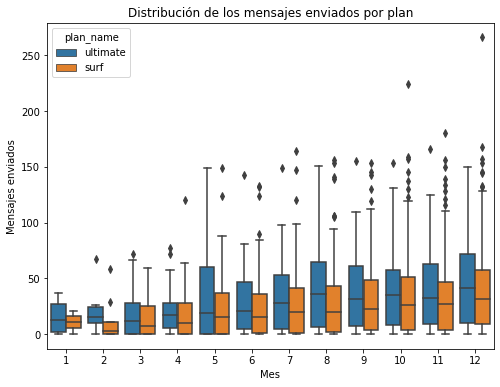

In [73]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes enviados
plt.figure(figsize=(8,6))
sns.boxplot(x="month",y="total_messages", hue= "plan_name", data=merge_consumption_plans)
plt.xlabel("Mes")
plt.ylabel("Mensajes enviados")
plt.title("Distribución de los mensajes enviados por plan")
plt.show()

A diferencia de los minutos gastados, que si bien iban aumentando mes a mes, su incremento era con más suave, con una pendiente menos pronunciada , sin embargo, en el caso de los mensajes, si se nota un crecimiento acelerado en la cantidad de mensajes enviados conforme van pasando los meses del año. Los usuarios del plan surf envian más mensajes que los del plan ultimate, inclusive, en algunos meses casi duplicando el número.

Seria interesante analizar la relación que existe entre los mensajes y la edad de los usuarios, en donde la gente mayor, es decir, de otras generaciones todavia tienen más arraigado el marcar por teléfono que el estar comunicandose por medio de mensajes, entonces sería interesante si a nivel estadístico podemos encontrar alguna relación.

Aún sin analizar esta relación, podemos ver que más usuarios tienen a enviar mensajes que a realizar llamadas.

Al igual que el análisis que hicimos de los minutos, en el caso de los mensajes, vemos que tenemos tambien muchos outliers o valores atípicos, esto podrían ser buenas oportunidades de mercado en ofrecerle a estos usuarios el plan ultimate.

### Internet

In [74]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
mb_per_plan = merge_consumption_plans.groupby(["plan_name","month"])["gb_used"].sum().reset_index()
mb_per_plan

,plan_name,month,gb_used
0,surf,1,28.0
1,surf,2,270.0
2,surf,3,719.0
3,surf,4,1444.0
4,surf,5,2606.0
5,surf,6,3639.0
6,surf,7,4872.0
7,surf,8,6525.0
8,surf,9,7803.0
9,surf,10,9951.0


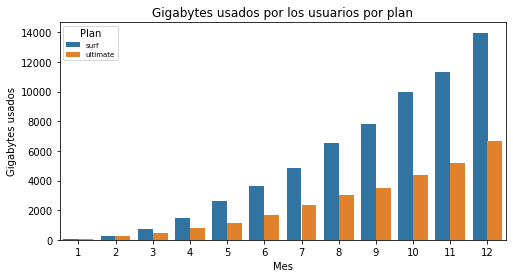

In [75]:
# Graficar la relación entre los megas utilizados cada mes por cada plan

plt.figure(figsize=(8,4))
sns.barplot(x="month", y="gb_used", hue="plan_name", data=mb_per_plan)
plt.xlabel("Mes")
plt.ylabel("Gigabytes usados")
plt.title("Gigabytes usados por los usuarios por plan")
plt.legend(prop={"size":7}).set_title("Plan")
plt.show()


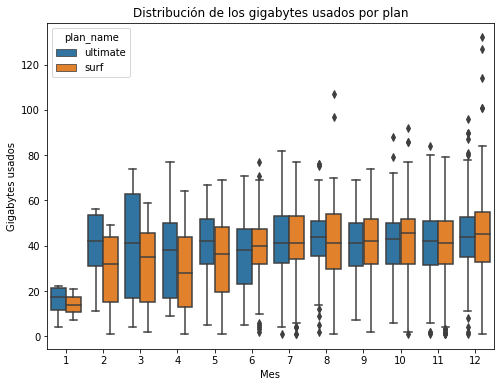

In [76]:
# Traza un diagrama de caja para visualizar la distribución de los megabytes usados
plt.figure(figsize=(8,6))
sns.boxplot(x="month",y="gb_used", hue= "plan_name", data=merge_consumption_plans)
plt.xlabel("Mes")
plt.ylabel("Gigabytes usados")
plt.title("Distribución de los gigabytes usados por plan")
plt.show()

El consumo de los megabytes tiene un comportamiento parecido al de los mensajes, se podria tener un indicio, de saber que el mercado le gusta mas enviar mensajes o comunicarse de otra manera por internet que hablar por teléfono.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

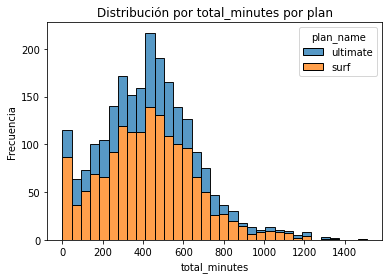

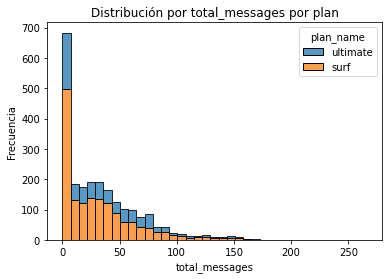

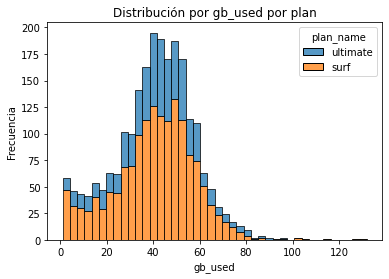

In [77]:
# Gráficas que demuestran la distribución de cada uno de los planes de la frecuencia
# por minutos, mensajes y volumne de internet usado.

columns = ["total_minutes","total_messages","gb_used"]
rows = ["user_id"]
for column in columns:
    sns.histplot(data=merge_consumption_plans, x=column, hue="plan_name",
                multiple="stack")
    plt.title(f"Distribución por {column} por plan")
    plt.ylabel("Frecuencia")
    plt.show()



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Para los tres casos, te recomiendo realizar una gráfica que muestre la distribución de cada uno de los planes de la frecuencia por cada minuto, numero de mensaje y el volumen de internet usado. 

</div>

## Ingreso

In [78]:
# Compara la cantidad de ingreso cada mes por plan
income_month_plan = merge_consumption_plans.groupby(["plan_name","month"])["total_expenses"].sum().reset_index()
income_month_plan

,plan_name,month,total_expenses
0,surf,1,100.00
1,surf,2,1689.57
2,surf,3,4756.65
3,surf,4,9095.53
4,surf,5,17387.37
5,surf,6,24869.80
6,surf,7,34513.56
7,surf,8,46246.85
8,surf,9,54374.67
9,surf,10,70804.83


In [79]:
# Ingreso total por el plan surf
surf_income = income_month_plan[income_month_plan["plan_name"] == "surf"]
total_income_surf = surf_income["total_expenses"].sum()
total_income_surf

443771.17999999993

In [80]:
# Ingreso total por el plan ultimate
ultimate_income = income_month_plan[income_month_plan["plan_name"] == "ultimate"]
total_income_ultimate = ultimate_income["total_expenses"].sum()
total_income_ultimate

119973.0

In [81]:
print(f"El ingreso total por el plan surf es de {total_income_surf.astype(int)} y el ingreso \ntotal por el plan ultimate es de {total_income_ultimate.astype(int)}.")
print()
print(f"Entonces, el plan surf genera {(total_income_surf-total_income_ultimate).astype(int)} más que el plan ultimate.")

El ingreso total por el plan surf es de 443771 y el ingreso 
total por el plan ultimate es de 119973.

Entonces, el plan surf genera 323798 más que el plan ultimate.


In [82]:
stats_ultimate = merge_consumption_plans[merge_consumption_plans["plan_name"] == "ultimate"].describe()
stats_ultimate

,user_id,month,total_calls,total_minutes,total_messages,gb_used,age,active_time,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,mb_used,total_expenses,total_expenses2
count,720.000000,720.000000,720.000000,720.000000,720.000000,719.000000,720.000000,52,720.0,720.0,720.0,720.0,720.0,7.200000e+02,7.200000e+02,720.000000,720.000000,720.000000
mean,1253.330556,9.151389,60.626389,430.450000,37.551389,41.137691,47.719444,224 days 21:41:32.307692308,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,41.080556,166.629167,208.041667
std,150.915644,2.558495,33.242994,240.508762,34.767179,16.468902,16.804088,83 days 17:14:21.906483327,0.0,0.0,0.0,0.0,0.0,1.735929e-18,1.735929e-18,16.528701,87.318976,124.741395
min,1000.000000,1.000000,0.000000,0.000000,0.000000,1.000000,18.000000,9 days 00:00:00,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.000000,70.000000,70.000000
25%,1126.000000,8.000000,36.000000,260.000000,7.000000,32.000000,34.000000,201 days 00:00:00,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,32.000000,84.000000,90.000000
50%,1241.500000,10.000000,61.000000,424.000000,30.000000,42.000000,48.500000,213 days 00:00:00,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,42.000000,154.000000,190.000000
75%,1401.000000,11.000000,80.000000,565.250000,61.000000,51.000000,64.000000,292 days 18:00:00,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,51.000000,217.000000,280.000000
max,1497.000000,12.000000,191.000000,1369.000000,166.000000,96.000000,75.000000,313 days 00:00:00,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,96.000000,532.000000,730.000000


In [83]:
stats_surf = merge_consumption_plans[merge_consumption_plans["plan_name"] == "surf"].describe()
stats_surf

,user_id,month,total_calls,total_minutes,total_messages,gb_used,age,active_time,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,mb_used,total_expenses,total_expenses2
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1558.000000,1573.000000,106,1573.0,1573.0,1573.0,1573.0,1573.0,1.573000e+03,1.573000e+03,1573.000000,1573.000000,1573.000000
mean,1242.755245,9.182454,59.811825,428.749523,31.159568,40.526958,44.379530,159 days 14:02:15.849056604,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,40.140496,282.117724,282.117724
std,139.227939,2.468199,32.017989,234.453150,33.566717,17.485040,16.646535,63 days 18:24:13.027940574,0.0,0.0,0.0,0.0,0.0,1.041165e-17,1.041165e-17,17.841862,163.239312,163.239312
min,1001.000000,1.000000,0.000000,0.000000,0.000000,1.000000,18.000000,7 days 00:00:00,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,0.000000,20.000000,20.000000
25%,1120.000000,8.000000,39.000000,272.000000,3.000000,31.000000,29.000000,140 days 00:00:00,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,30.000000,173.510000,173.510000
50%,1245.000000,10.000000,60.000000,425.000000,24.000000,42.000000,45.000000,174 days 00:00:00,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,42.000000,290.000000,290.000000
75%,1358.000000,11.000000,79.000000,576.000000,47.000000,52.000000,59.000000,188 days 00:00:00,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,52.000000,390.000000,390.000000
max,1499.000000,12.000000,205.000000,1510.000000,266.000000,132.000000,75.000000,254 days 00:00:00,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,132.000000,1210.370000,1210.370000


Podemos ver como tanto para los minutos, mensajes y gb usados, la media y la mediana obtienen valores muy parecidos en ambos planes.

La distribución de la edad, es decir, cuantos años tienen los que adquieren el plan es muy parecida en ambos planes, aunque si se nota una diferencia respecto a que gente más joven contrata el plan surf, lo cual se podrian entender que es debido al precio, y los más jovenes podrian tener menos poder adquisitivo, sin embargo, como vimos en otros análisis son los que se pasan más de los megas y mensajes, por tanto, generan más gastos. En general, la gente más grande es mas consiente de las cosas y tiene a ser mas precabida , ya que además de ser más consiente tiene otras obligaciones económicas que debe cumplir como inclusive ya familia, casa, auto y otras cosas que debe consierar. Si bien se podria entender por "lógica" que el plan surf esta destinado a un mercado más joven, por medio de este análisis descriptivo, podemos ciertos indicios de que es así.

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Te recomiendo obtener estadística descriptiva de cada partida (llamadas, mensajes, internet) e ingresos por plan (media, mediana, moda, desviación típica, varianza) para identificar la distribución de los datos y algunos hallazgos antes de pasar a las pruebas de hipótesis.

</div>

## Prueba las hipótesis estadísticas

### Prueba de hipótesis 1

In [84]:
# Prueba las hipótesis 1
# H0(nula) es que los ingresos promedios de los usarios de los planes de llamada ultimate y surf sean iguales
# H1(alternativa) es que los ingresos promedios de los usarios de los planes de llamada ultimate y surf no son iguales

plan_income_minutes = merge_consumption_plans.groupby(["plan_name","user_id"])["total_expenses"].mean().reset_index()
plan_income_minutes



,plan_name,user_id,total_expenses
0,surf,1001,302.018000
1,surf,1002,193.333333
2,surf,1003,418.120000
3,surf,1004,370.000000
4,surf,1005,380.000000
...,...,...,...
485,ultimate,1482,123.666667
486,ultimate,1487,140.000000
487,ultimate,1490,322.000000
488,ultimate,1493,134.400000


In [85]:
# Los ingresos promedios del plan surf

surf_income = plan_income_minutes[plan_income_minutes["plan_name"] == "surf"]
surf_income = surf_income["total_expenses"]
surf_income

0      302.018000
1      193.333333
2      418.120000
3      370.000000
4      380.000000
          ...    
328    282.291667
329    490.825000
330    218.000000
331    382.727273
332    345.000000
Name: total_expenses, Length: 333, dtype: float64

In [86]:
# Los ingresos promedios del plan ultimate

ultimate_income = plan_income_minutes[plan_income_minutes["plan_name"] == "ultimate"]
ultimate_income = ultimate_income["total_expenses"]
ultimate_income

333     70.000000
334    182.000000
335    196.000000
336    215.000000
337    259.000000
          ...    
485    123.666667
486    140.000000
487    322.000000
488    134.400000
489     70.000000
Name: total_expenses, Length: 157, dtype: float64

In [87]:
alpha = 0.05
results1 = st.ttest_ind(surf_income,ultimate_income,equal_var=False)

print('valor p:', results1.pvalue)

if results1.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 6.539448654633006e-33
Rechazamos la hipótesis nula


Entonces, podemos aceptar la hipotesis alternativa que indica que los ingresos promedios de los usarios de los planes de llamada ultimate y surf no son iguales

### Prueba de hipotesis 2

In [88]:
# Prueba las hipótesis 2
# H0(nula) es que el ingreso promedio de los usuarios del área NY-NJ es igual de los usuarios de las otras regiones
# H1(alternativa) es que el ingreso promedio de los usuarios del área NY-NJ es mayor que de los usuarios de las otras regiones

find_city = merge_consumption_plans[merge_consumption_plans["city"].str.contains("NY-NJ")]
print(find_city)

#other_city = merge_consumption_plans[~merge_consumption_plans["city"].str.contains("NY-NJ")]
#print(other_city)


      user_id  month  total_calls  total_minutes  total_messages  gb_used  \
56       1014     11         28.0          163.0               9      2.0   
57       1014     12        150.0         1114.0              64     17.0   
75       1022      5         39.0          302.0               0     12.0   
76       1022      6         76.0          490.0               0     65.0   
77       1022      7         70.0          475.0               0     33.0   
...       ...    ...          ...            ...             ...      ...   
2260     1080      9          0.0            0.0              64     46.0   
2261     1080     10          0.0            0.0              59     61.0   
2262     1080     11          0.0            0.0              50     70.0   
2263     1080     12          0.0            0.0              61     50.0   
2290     1482     10          0.0            0.0               2      NaN   

     first_name last_name  age                                       city  

In [89]:
income_city = find_city["total_expenses"]
income_city

56       20.00
57       58.84
75       20.00
76      520.00
77      200.00
         ...  
2260    330.42
2261    480.27
2262    570.00
2263    370.33
2290     70.00
Name: total_expenses, Length: 377, dtype: float64

In [90]:
other_city = merge_consumption_plans[~merge_consumption_plans["city"].str.contains("NY-NJ")]
print(other_city)

      user_id  month  total_calls  total_minutes  total_messages  gb_used  \
0        1000     12         16.0          124.0              11      4.0   
1        1001      8         27.0          182.0              30     21.0   
2        1001      9         49.0          315.0              44     41.0   
3        1001     10         65.0          393.0              53     50.0   
4        1001     11         64.0          426.0              36     49.0   
...       ...    ...          ...            ...             ...      ...   
2287     1349     11          0.0            0.0              72     34.0   
2288     1349     12          0.0            0.0              61     27.0   
2289     1361      5          0.0            0.0               2      7.0   
2291     1108     12          0.0            0.0               0      2.0   
2292     1311      6          0.0            0.0               0      7.0   

      first_name  last_name  age                                   city  ..

In [91]:
income_other_city = other_city["total_expenses"]
income_other_city

0        70.00
1        80.00
2       280.00
3       370.09
4       360.00
         ...  
2287    210.66
2288    140.33
2289     20.00
2291     70.00
2292     70.00
Name: total_expenses, Length: 1916, dtype: float64

In [92]:
alpha = 0.05
results2 = st.ttest_ind(income_city,income_other_city,equal_var=False)

print('valor p:', results2.pvalue)

if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.004632562058700195
Rechazamos la hipótesis nula


Por lo tanto, no podemos rechazar el ingreso promedio de los usuarios del área NY-NJ es igual de los usuarios de las otras regiones

## Conclusión general

Al finalizar nuestro análisis sobre el comportamiento de los usuarios que contrataron los planes surf o ultimate encontramos interentes conclusiones o lineas de posibles investigaciones futuras.

Vemos que los clientes son sensibles al precio que pagan por cada plan, y esto se ve, en que hay muchos más clientes que tienen el plan surf que el últimate, sin embargo, es curioso notar que si bien al parecer escogen un plan por el precio, estos clientes, llegan a gastar más por los cobros extras al revasar los beneficios tanto en minutos, mensansajes y gigas que ofrece el plan surf.

En relación a las llamadas, ambos planes tienen un comportamiento parecido respecto a los minutos que usan.

En relación tanto a mensajes y gigabytes, es donde se disparan las diferencias, siendo los del plan surf que hacen más uso de ambos servicios.

Finalmente, estas tendendecias y comportamientos de consumo se ven reflejados al final en el ingreso que genera cada plan para la empresa, siendo el surf, el que más ingresos da aún cuando su renta mensual es la más economica.

Entonces, en relación a crear una campaña de publicidad, podemos inclusive mantener el precio de $20 que ya es un factor que parece por el cual los clientes prefieren el plan, y para que lo contraten más, subir el numero de gigabytes y mensajes que se oferecen a un rango que no sobrepase el numero que en promedio revasan los usuarios. De esta forma, ellos recibiran más pagando lo mismo, pero al final, seguirán pagando más porque se pasan de lo que se les ofrece.

Y para el plan últimate, mantenerlo igual para los clientes más premium o que les gusta sentir que tienen más cosas, porque al final, igual se siguen pasando tanto en mensajes como en gigabytes, y adicional, pagan una mensualidad mayor.


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, así como juntar la información. Además, considero que el análisis con las gráficas y con las pruebas de hipótesis es muy acertado. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que las librerías las importas desde la primera parte del código
    
* Tener precaución de no llenar variables con valor NaN con datos no reales
    
* Verificar la transformación de la variables mb a gb y verificar que redondeamos las variables antes de hacer la agrupación por usuario
</div>